In [1]:

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

import stan_utility
import pystan


In [2]:
light="#DCBCBC"
light_highlight="#C79999"
mid="#B97C7C"
mid_highlight="#A25050"
dark="#8F2727"
dark_highlight="#7C0000"
green="#00FF00"

In [19]:
model_gen = stan_utility.compile_model('generate_y_err.stan')

n_obs = 15
slope=2.
intercept=1.
sigma=1.
x_min = -1.
x_max = 1.

fit = model_gen.sampling(data=dict(n_obs=n_obs,
                                   slope=slope,
                                   intercept=intercept,
                                   sigma=sigma,
                                   x_min=x_min,
                                   x_max=x_max ),
                         seed=194838, algorithm='Fixed_param', iter=1, chains=1)


N_model = 100
x_model=np.linspace(x_min, x_max, N_model)
data = dict(N = fit.extract()['N'].astype(np.int64),
            x_obs = fit.extract()['x_obs'][0,:],
            y_obs = fit.extract()['y_obs'][0,:],
            y_latent = fit.extract()['y_latent'][0,:],
            sigma = sigma,
            N_model=N_model,
            x_model=x_model
            
           )

pystan.stan_rdump(data, 'xy.data.R')

Using cached StanModel


/Users/jburgess/.environs/stan/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [20]:
fit = model.sampling(data=data, seed=352435)

/Users/jburgess/.environs/stan/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


<IPython.core.display.Javascript object>


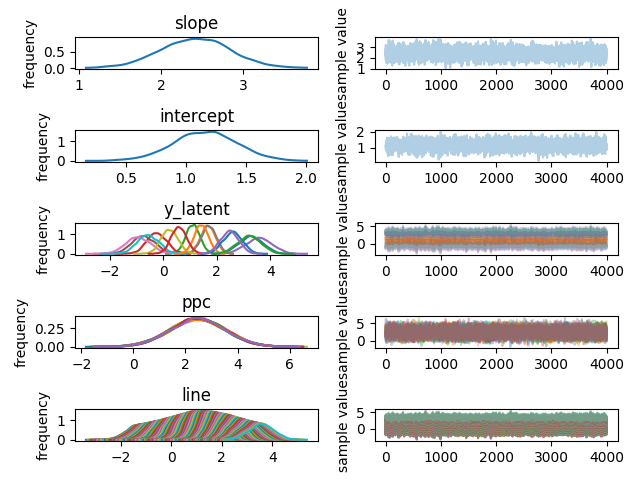

In [21]:
fit.plot();
plt.tight_layout()

<IPython.core.display.Javascript object>


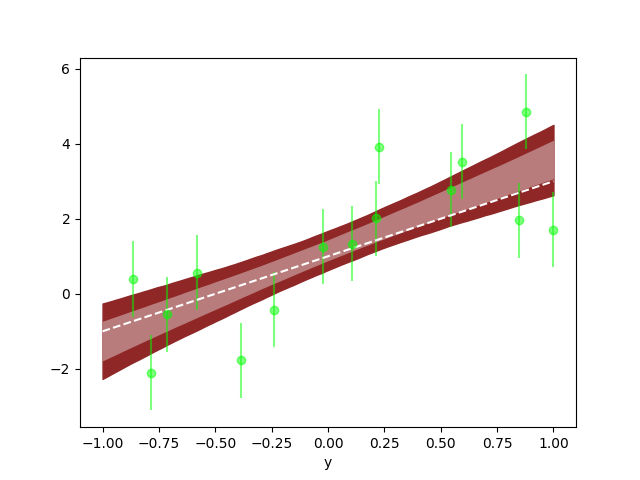

Text(0.5,0,'y')

In [22]:
fig, ax = plt.subplots()

chain = fit.extract()

level = 95

ax.fill_between(x_model,
                np.percentile(chain['line'], 50 - 0.5*level, axis=0 ),
                np.percentile(chain['line'], 50 + 0.5*level, axis=0 ),
                color=dark)

level = 68

ax.fill_between(x_model,
                np.percentile(chain['line'], 50 - 0.5*level, axis=0 ),
                np.percentile(chain['line'], 50 + 0.5*level, axis=0 ),
                color=mid)

ax.plot(x_model, slope*x_model+intercept,'w--')

ax.errorbar(data['x_obs'], data['y_obs'], yerr=data['sigma'],fmt='o', color=green, alpha= .5)

ax.set_xlabel('x')
ax.set_xlabel('y')


<IPython.core.display.Javascript object>


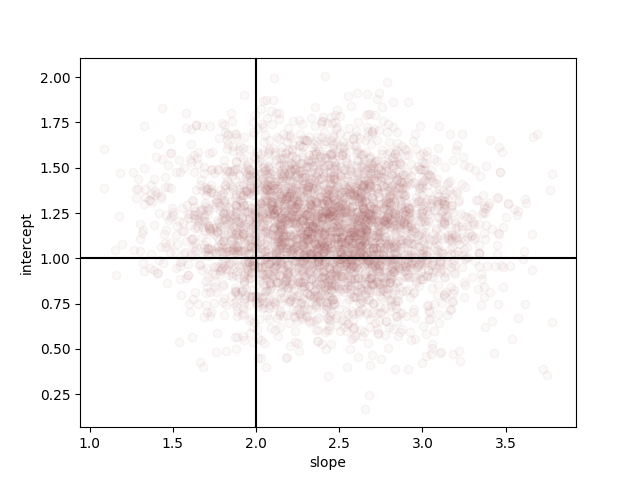

Text(0,0.5,'intercept')

In [23]:
fig, ax = plt.subplots()

ax.scatter(chain['slope'],chain['intercept'], facecolor=mid, edgecolor=mid_highlight, alpha=.05)
ax.axvline(slope, color='k')
ax.axhline(intercept, color='k')

ax.set_xlabel('slope')
ax.set_ylabel('intercept')

## XY

Now we move to the problem of fitting data when there is measurement on both the X and Y data.

In [34]:
model_gen = stan_utility.compile_model('generate_xy_err.stan')

n_obs = 20
slope=2.
intercept=1.
sigma_x=1.
sigma_y=3.
x_min = -10.
x_max = 10.


fit = model_gen.sampling(data=dict(n_obs=n_obs,
                                   slope=slope,
                                   intercept=intercept,
                                   sigma_x=sigma_x,
                                   sigma_y=sigma_y,
                                   x_min=x_min,
                                   x_max=x_max ),
                         seed=194838, algorithm='Fixed_param', iter=1, chains=1)

N_model = 100
x_model=np.linspace(x_min, x_max, N_model)
data = dict(N = fit.extract()['N'].astype(np.int64),
            x_obs = fit.extract()['x_obs'][0,:],
            y_obs = fit.extract()['y_obs'][0,:],
            y_latent = fit.extract()['y_latent'][0,:],
            sigma_x=sigma_x,
            sigma_y=sigma_y,
            N_model=N_model,
            x_model=x_model

           )



pystan.stan_rdump(data, 'xyerr.data.R')

Using cached StanModel


/Users/jburgess/.environs/stan/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [35]:
model = stan_utility.compile_model('fit_xyline.stan')

Using cached StanModel


In [39]:

fit = model.sampling(data=data, seed=352435, iter=4000)



/Users/jburgess/.environs/stan/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


<IPython.core.display.Javascript object>


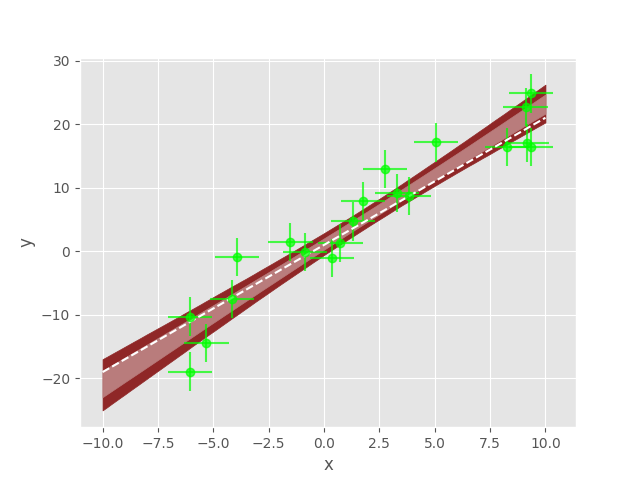

In [40]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots()

    chain = fit.extract()



    level = 95

    ax.fill_between(x_model,
                    np.percentile(chain['line'], 50 - 0.5*level, axis=0 ),
                    np.percentile(chain['line'], 50 + 0.5*level, axis=0 ),
                    color=dark)

    level = 68

    ax.fill_between(x_model,
                    np.percentile(chain['line'], 50 - 0.5*level, axis=0 ),
                    np.percentile(chain['line'], 50 + 0.5*level, axis=0 ),
                    color=mid)


    ax.plot(x_model, slope*x_model +intercept, 'w--')

    ax.errorbar(data['x_obs'],
                data['y_obs'], 
                yerr=data['sigma_y'], 
                xerr=data['sigma_x'] ,fmt='o', color=green, alpha= .7)



    ax.set_xlabel('x')
    ax.set_ylabel('y')



<IPython.core.display.Javascript object>


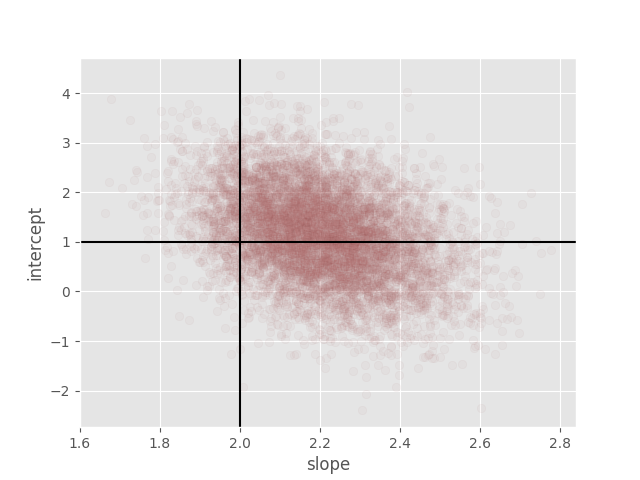

In [41]:
with plt.style.context('ggplot'):

    fig, ax = plt.subplots()

    ax.scatter(chain['slope'],chain['intercept'], facecolor=mid, edgecolor=mid_highlight, alpha=.05)
    ax.axvline(2., color='k')
    ax.axhline(1., color='k')

    ax.set_xlabel('slope')
    ax.set_ylabel('intercept')